## Optimizing Instagram Ads with Naive Bayes

**IMPORTING LIBRARIES ,IMPORTING DATASET , DEPENDENT AND INDEPENDENT VARIABLE DIFFRENTIATION, SPLITING DATA INTO TRAINING AND TESTING SET , FEATURE SCALING , MACHINE TRAINIG WIH TRAINING DATA, PREDICTING FOR NEW VALUES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/PREPINSTA /MACHINE LEARNING /4. CLASSIFICATION /DATASET / Instagram Ads Naive Bayes.csv")
data_set

,Age,Mobile Phone,Purchased
0,15,6334,0
1,28,6667,0
2,20,14334,0
3,21,19000,0
4,15,25334,0
...,...,...,...
194,28,26334,0
195,34,43000,1
196,42,11334,1
197,37,16667,1


In [ ]:
X = data_set.iloc[: , :-1].values
y = data_set.iloc[:,-1].values


In [ ]:
print(X)

[[   15  6334]
 [   28  6667]
 [   20 14334]
 [   21 19000]
 [   15 25334]
 [   21 19334]
 [   21 28000]
 [   25 50000]
 [   20 11000]
 [   28 21667]
 [   20 26667]
 [   26 17000]
 [   28 36000]
 [   18  6667]
 [   20 26334]
 [   21 18000]
 [   24 45000]
 [   24 29667]
 [   19 10667]
 [   14 14667]
 [   23 27667]
 [   28  7667]
 [   21 19334]
 [   19 18334]
 [   18 16000]
 [   22 26334]
 [   17  6000]
 [   25 39000]
 [   21  6667]
 [   20 29000]
 [   18 22000]
 [   25 40000]
 [   17 21000]
 [   24 22667]
 [   20 26667]
 [   19  9000]
 [   16  7667]
 [   26 37667]
 [   25  6000]
 [   27 37334]
 [   24 38667]
 [   20  5000]
 [   23  9334]
 [   23 27667]
 [   26 49667]
 [   15  7000]
 [   16 24000]
 [   20 11667]
 [   21 29667]
 [   20 28667]
 [   30 26667]
 [   31 23667]
 [   29 23667]
 [   20 30000]
 [   29 11000]
 [   17 18334]
 [   28 23667]
 [   23 49334]
 [   23 15667]
 [   16 29334]
 [   27 38334]
 [   20 39334]
 [   27 14334]
 [   27 24000]
 [   18  9334]
 [   28 15667]
 [   20  7

In [ ]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 0 1 0 0 1 1 1 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 9.26623146e-01  1.73236151e+00]
 [-5.37020232e-01  1.08344627e+00]
 [-1.71109388e-01  7.58988652e-01]
 [-1.26884192e+00 -1.43110027e+00]
 [ 8.04652865e-01  5.60512207e-02]
 [-7.80960796e-01 -1.40400806e+00]
 [-7.80960796e-01 -9.98436040e-01]
 [-1.71109388e-01 -2.14384204e-01]
 [-1.71109388e-01  1.73236151e+00]
 [ 1.94801457e-01 -2.41395301e-01]
 [-1.71109388e-01 -5.38841823e-01]
 [-4.91391062e-02 -5.21553951e-02]
 [-1.14687164e+00 -1.75555789e+00]
 [-4.91391062e-02  1.94791283e-03]
 [ 4.38742020e-01  1.94791283e-03]
 [-1.51278248e+00 -1.67444349e+00]
 [ 3.16771738e-01 -6.19956228e-01]
 [ 3.16771738e-01 -5.21553951e-02]
 [-4.91391062e-02 -7.91664918e-02]
 [-1.14687164e+00 -9.98436040e-01]
 [-6.58990514e-01 -2.50631839e-02]
 [-1.63475277e+00 -2.14384204e-01]
 [ 1.17056371e+00  1.64176722e-01]
 [ 1.04859343e+00  1.38089279e+00]
 [ 4.38742020e-01  7.58988652e-01]
 [-1.63475277e+00 -1.53922578e+00]
 [-1.14687164e+00  1.02942408e+00]
 [-1.02490136e+00 -5.92864017e-01]
 [ 1.94801457e-01  1

In [ ]:
print(X_test)

[[ 1.17056371 -0.1602809 ]
 [-1.02490136 -0.70107063]
 [ 0.19480146 -1.02552825]
 [ 1.65844484  0.65086315]
 [-0.29307967 -0.99843604]
 [ 1.17056371  0.24529113]
 [-1.63475277  0.05605122]
 [-1.26884192 -1.53922578]
 [ 1.78041512  0.65086315]
 [ 0.07283118 -0.80919613]
 [ 0.19480146 -0.1332698 ]
 [ 0.07283118 -0.2413953 ]
 [-0.17110939 -0.89031054]
 [-1.3908122  -0.37661301]
 [ 0.92662315 -0.89031054]
 [ 2.02435568  0.56974875]
 [-1.51278248 -0.67397842]
 [-0.29307967  0.94830967]
 [ 0.80465286 -1.56623687]
 [ 1.04859343  1.5701327 ]
 [-0.65899051  1.48901829]
 [ 0.31677174 -0.75509283]
 [ 1.17056371 -0.40362411]
 [ 0.92662315  0.89420636]
 [-1.14687164 -1.56623687]
 [ 1.04859343  1.05643517]
 [ 1.9023854  -0.1602809 ]
 [-0.17110939 -0.40362411]
 [-1.26884192 -1.29588256]
 [ 1.04859343  1.4620072 ]
 [ 0.43874202 -0.40362411]
 [-1.75672305 -1.59332908]
 [ 1.9023854  -0.53884182]
 [ 1.78041512 -1.10664266]
 [-0.17110939  0.29939443]
 [-0.41504995 -1.05253935]
 [ 0.68268258 -1.10664266]
 

**NAIVE BAYES TRAINING ON TRAINING SET**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train , y_train)

GaussianNB()

**PREDICTING FOR NEW VALUE**

In [ ]:
print(classifier.predict(sc.transform([[36, 17000]])))

[0]


**COMPARING THE PREDICTION AND TESTIND DATA**

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)) , 1))

[[1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]]


**CONFUSION MATRIX AND ACCURACY OF MODEL CHEAKING**

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cn = confusion_matrix(y_test , y_pred)
ac = accuracy_score(y_test , y_pred)
print(cn)
print(ac)

[[36  4]
 [ 2 18]]
0.9


**VISUALIZING THE TRAING SET RESULT**

<ipython-input-25-b60cd55ab729>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


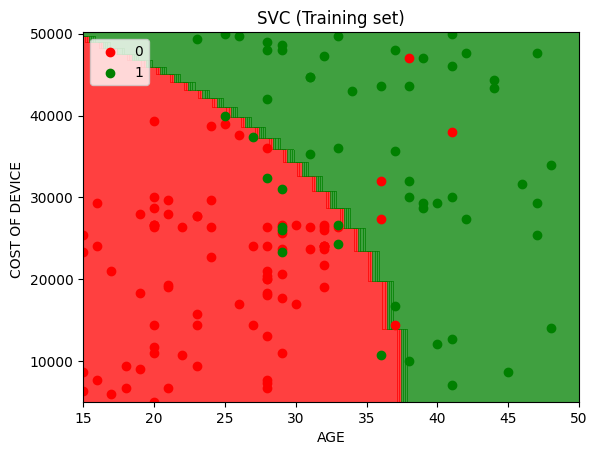

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVC (Training set)')
plt.xlabel('AGE')
plt.ylabel('COST OF DEVICE ')
plt.legend()
plt.show()

**VISUALIZING THE TESTING SET RESULT**

<ipython-input-24-019f0da46a25>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


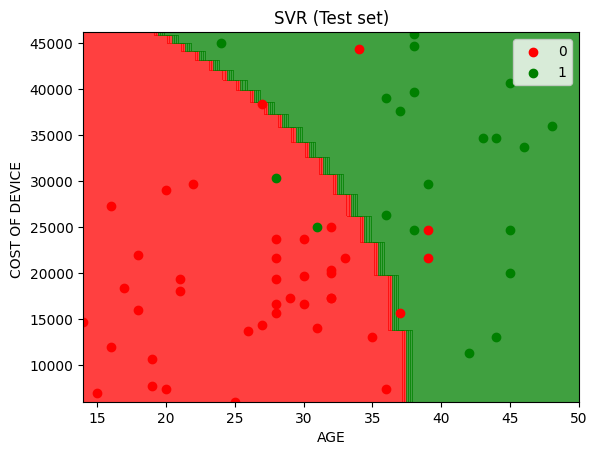

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVR (Test set)')
plt.xlabel('AGE')
plt.ylabel('COST OF DEVICE ')
plt.legend()
plt.show()